## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import KFold

## CIFAR100

In [2]:
# Load the data from the CIFAR100 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data()

In [ ]:
print("train_images.shape is ", train_images.shape)
print("train_labels.shape is ", train_labels.shape)
print("test_images.shape is ", test_images.shape)
print("test_labels.shape is ", test_labels.shape)

## Visualizing all 100 classes

In [ ]:
for i in range(100):
    for j in range(len(train_labels)):
        if train_labels[j] == i:
            plt.subplot(10,10,i+1)
            plt.imshow(train_images[j])
            plt.title(train_labels[j])
            break
plt.show()

## Visualizing before normalization

In [ ]:
plt.subplot(1,2,1)
plt.imshow(train_images[0])
plt.subplot(1,2,2)
plt.imshow(test_images[0])
plt.show()

## Normalization

In [6]:
#normalize the data by subtarcting the mean and dividing by the standard deviation
training_images_norm = (train_images - np.mean(train_images)) / np.std(train_images)
testing_images_norm = (test_images - np.mean(test_images)) / np.std(test_images)

## Visualizing after normalization

In [ ]:
plt.subplot(1,2,1)
plt.imshow(training_images_norm [0])
plt.subplot(1,2,2)
plt.imshow(testing_images_norm[0])
plt.show()

## MNN Model

In [ ]:
#create a second model with MNN layers
model_MNN = tf.keras.models.Sequential()
model_MNN.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
model_MNN.add(tf.keras.layers.Dense(1024, activation='relu'))
model_MNN.add(tf.keras.layers.Dense(512, activation='relu'))
model_MNN.add(tf.keras.layers.Dense(256, activation='relu'))
model_MNN.add(tf.keras.layers.Dense(128, activation='relu'))
model_MNN.add(tf.keras.layers.Dense(100, activation='softmax'))
model_MNN.summary()
#compile the model
model_MNN.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
#stop training when the validation loss is not improving
stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,restore_best_weights=True)

## MNN training using k-fold cross validation method 

In [ ]:
#k-fold cross validation
kfold = KFold(n_splits=5, shuffle=True)
history_MNN = []
for train, validation in kfold.split(training_images_norm, train_labels):
    history_MNN.append(model_MNN.fit(training_images_norm[train], train_labels[train], epochs=100,
    validation_data=(training_images_norm[validation], train_labels[validation]), callbacks=[stop]))

In [ ]:
accuracy_MNN = []
validation_accuracy_MNN = []
loss_MNN = []
validation_loss_MNN = []
for i in range(len(history_MNN)):
    accuracy_MNN+=history_MNN[i].history['accuracy']
    validation_accuracy_MNN+=history_MNN[i].history['val_accuracy']
    loss_MNN+=history_MNN[i].history['loss']
    validation_loss_MNN+=history_MNN[i].history['val_loss']

## Evaluating MNN model with test data

In [ ]:
#evaluate the MNN model
test_loss_MNN, test_acc_MNN = model_MNN.evaluate(testing_images_norm,  test_labels, verbose=2)
print('Test accuracy:', test_acc_MNN)
print('Test loss:', test_loss_MNN)

## Predicting test data

In [ ]:
#predict the labels for the test images(MNN)
predictions_MNN = model_MNN.predict(testing_images_norm)

## Plotting accuracy of training and testing data using MNN model 

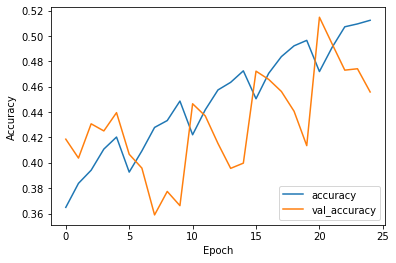

In [ ]:
#plot the accuracy and loss for the MNN model
plt.plot(accuracy_MNN, label='accuracy')
plt.plot(validation_accuracy_MNN, label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

## Plotting loss of training and testing data using MNN model 

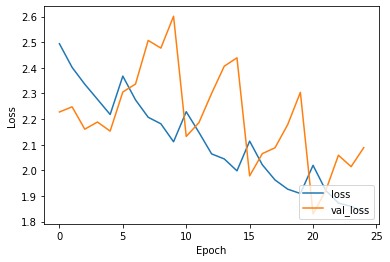

In [ ]:
#plot the loss for the MNN model
plt.plot(loss_MNN, label='loss')
plt.plot(validation_loss_MNN, label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()